# Hiperparâmetros da MLP

Neste notebook veremos o comportamento dos modelos com diferentes arquiteturas e hiperparâmetros da classe [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier). Primeiro veremos como diferentes números de neurônios da camada escondida cortam o espaço de atributos. Também utilizaremos bases reais para observar o comportamento dos modelos quando alteramos diferentes valores de hiperparâmetros. 

Abaixo, carregamos as bibliotecas que utilizaremos, bem como as funções de visualização de fronteira de decisão já utilizadas em outras tutorias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    
    classes = np.unique(y)

    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .01     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Right now it only works with binary tasks: expand both dictionaries or use cmap for multiclass tasks
    colors = {0:'red', 1:'green'}
    markers = {0: 'o', 1: '^'}
    
    # Plotting
    #plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdYlGn')
    plt.figure(figsize = (10,10))
    for class_v in classes:
        imask = y == class_v
        plt.scatter(X[imask, 0], X[imask, 1], c=colors[class_v], alpha=0.8, marker=markers[class_v], s = 50)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='RdYlGn')
    plt.xlabel("x1",fontsize=15)
    plt.ylabel("x2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [2]:
def plot_2D_task(X, y):
    # scatter plot, dots colored by class value
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], y=y))
    colors = {0:'red', 1:'green'}
    markers = {0: 'o', 1: '^'}
    fig, ax = plt.subplots(figsize = (10,10))
    grouped = df.groupby('y')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key], marker=markers[key], s = 50)
    plt.show()

## Número de neurônios nas camadas escondidas e função de ativação

Começaremos utilizando a base abaixo. Ela tem algumas características interessantes: (1) ela possui duas dimensões, o que nos permite visualizar; (2) as classes não são linearmente separáveis.

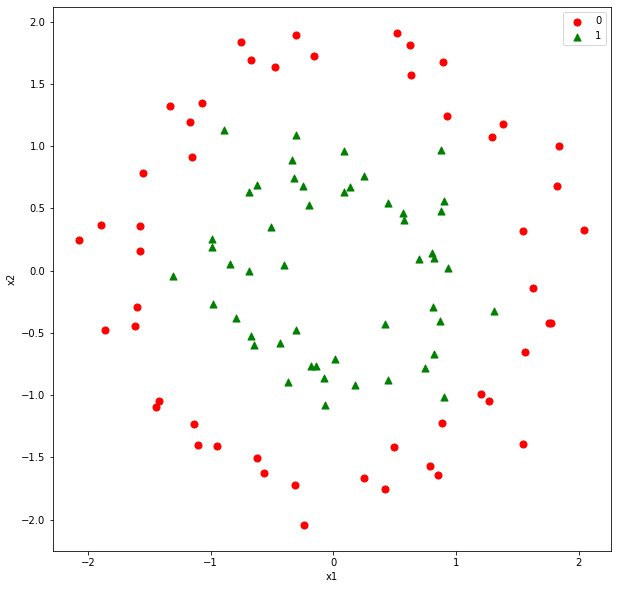

In [484]:
Xc_orig, yc = make_circles(n_samples=100, factor = 0.5, noise = 0.1, random_state = 42)
scaler = StandardScaler()
scaler.fit(Xc_orig)
Xc = scaler.transform(Xc_orig)
plot_2D_task(Xc, yc)

Vamos começar gerando uma rede neural com 1 neurônio na camada escondida. Com um neurônio na camada escondida, o modelo consegue apenas gerar uma reta separando o espaço de atributos. Para definir esta arquitetura para nossa rede neural, utilizamos o hiperparâmetro **hidden_layer_sizes**.

**hidden_layer_sizes** define o tamanho de cada camada oculta usando tuplas. Por exemplo, para criar uma rede MLP com 3 camadas ocultas, com 100 neurônios na primeira camada oculta, 50 na segunda e 20 na terceira, basta fazer `hidden_layer_sizes = (100,50,20,)`. O valor padrão desse hiperparâmetro no sklearn é `(100,)`.

Então, para gerarmos uma rede com 1 neurônio e 1 camada oculta, fazemos `hidden_layer_sizes = (1,)`. Dessa forma, nossa rede terá 2 neurônios na camada de entrada (número de atributos), 1 na camada oculta e 2 neurônios na camada de saída (quantidade de classes). Repare que o modelo gerou apenas uma reta. 

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

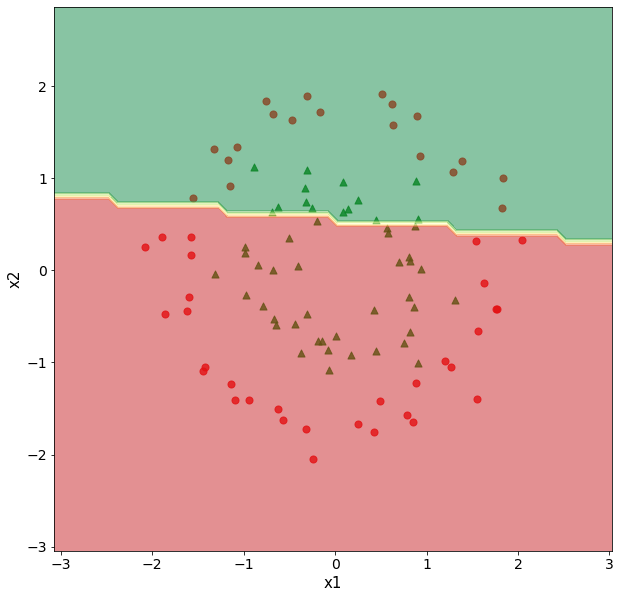

In [508]:
plot_decision_boundaries(Xc,yc, MLPClassifier, hidden_layer_sizes = (1,), max_iter = 5000, random_state = 42)

Com dois neurônios na camada escondida, o modelo consegue agora fazer duas retas.

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

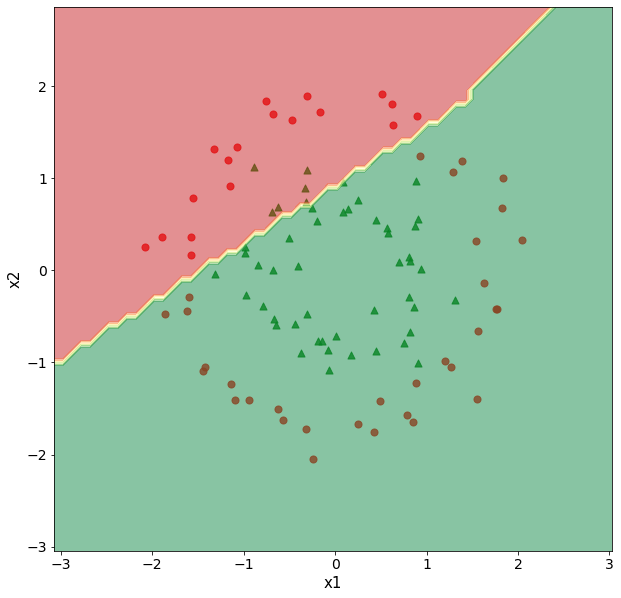

In [486]:
plot_decision_boundaries(Xc,yc, MLPClassifier, hidden_layer_sizes = (2,), max_iter = 5000, random_state = 42)

Observe agora com 4 neurônios

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

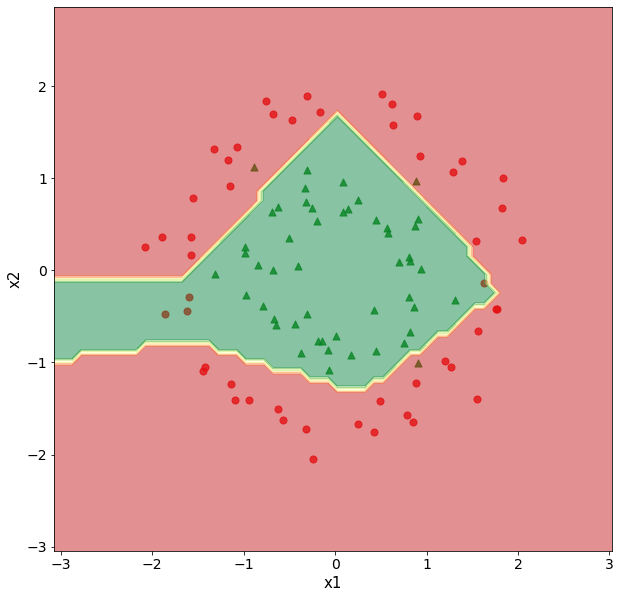

In [487]:
plot_decision_boundaries(Xc,yc, MLPClassifier, hidden_layer_sizes = (4,), max_iter = 5000, random_state = 42)

Consideramos retas porque estamos utilizando a função de ativação **ReLU**, que é o padrão do sklearn. Podemos mudar a função de ativação e outros tipos de corte podem ser obtidos.

activation define a função de ativação de cada neurônio na camada oculta. Ela pode assumir qualquer um dos seguintes valores `{'identity', 'logistic', 'tanh', 'relu'}`. Seu valor padrão é `'relu'`.

Por exemplo, se utilizarmos `activation = 'tanh'`, observamos outro tipo de corte.

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

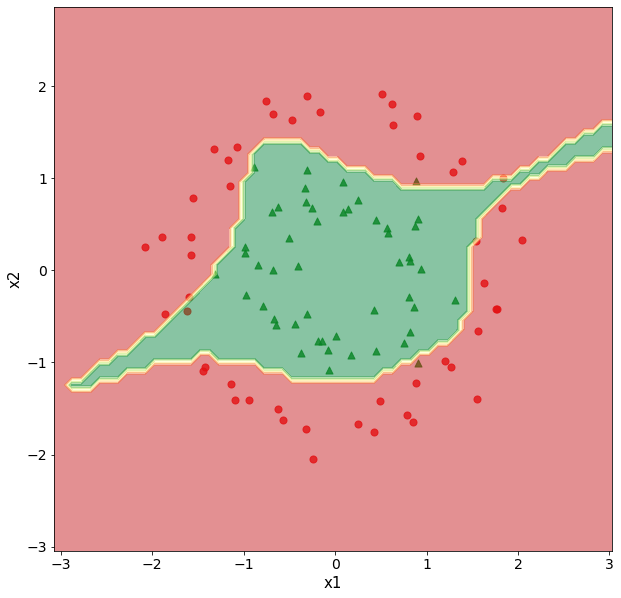

In [488]:
plot_decision_boundaries(Xc,yc, MLPClassifier, hidden_layer_sizes = (4,), activation = 'tanh', max_iter = 5000, random_state = 1)

Voltando para `activation = 'ReLU'` e oferencendo um número maior de neurônios na camada oculta, observamos que o algoritmo foi capaz de gerar um modelo mais adequado. 

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

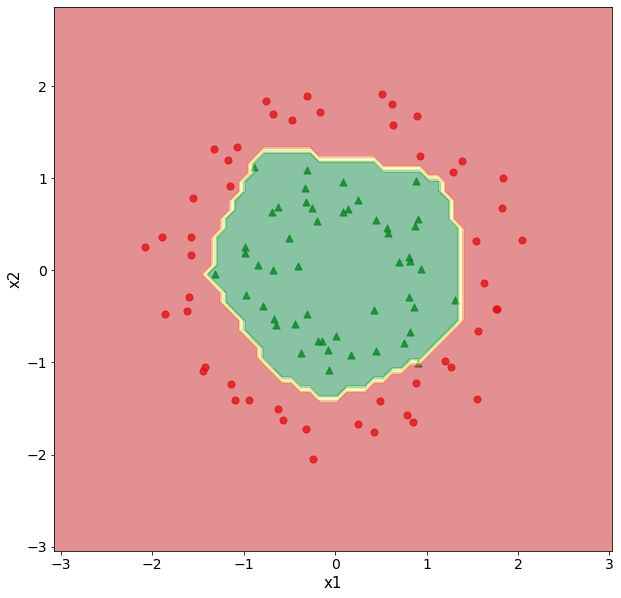

In [489]:
plot_decision_boundaries(Xc,yc, MLPClassifier, hidden_layer_sizes = (10,), max_iter = 5000, random_state = 42)

Agora vamos considerar uma outra base mais complexa

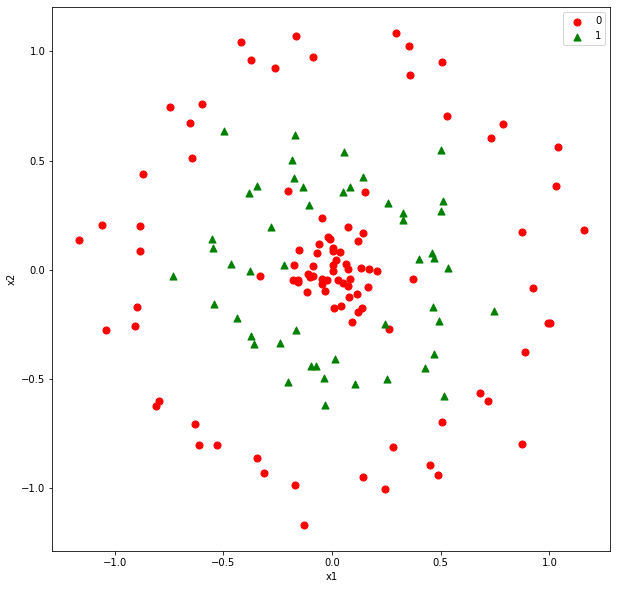

In [490]:
Xc2, yc2 = make_circles(n_samples=100, factor = 0.1, noise = 0.1, random_state = 42)
Xc2 = Xc2[yc2 == 1]
yc2 = yc2[yc2 == 0]
Xc2 = np.concatenate((Xc_orig,Xc2), axis = 0)
yc2 = np.concatenate((yc,yc2), axis = 0)
scaler.fit(Xc2)
X = scaler.transform(Xc2)
plot_2D_task(Xc2, yc2)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

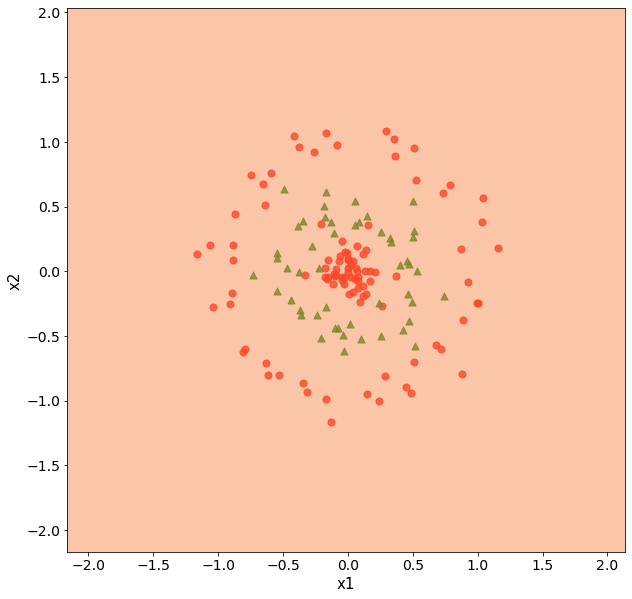

In [491]:
plot_decision_boundaries(Xc2,yc2, MLPClassifier, hidden_layer_sizes = (10,), max_iter = 5000, random_state = 42)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

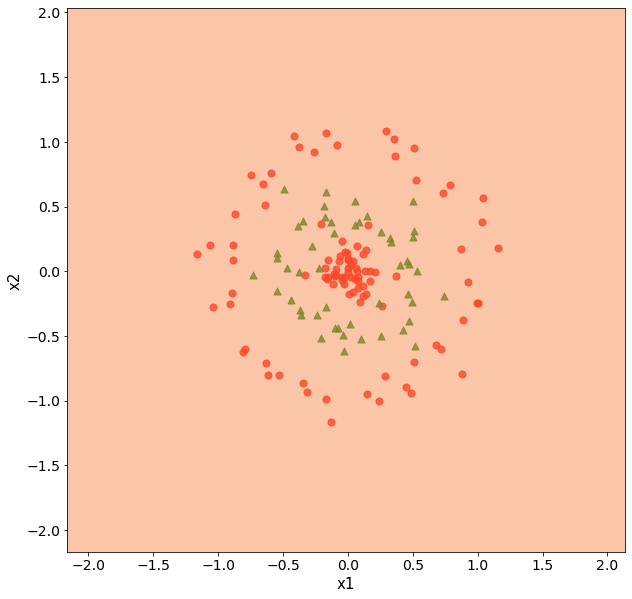

In [492]:
plot_decision_boundaries(Xc2,yc2, MLPClassifier, hidden_layer_sizes = (30,), max_iter = 5000, random_state = 42)

Na vídeo aula, o professor comentou que uma das possibilidades para a arquitetura de uma rede neural é considerar a primeira camada oculta traçando os hiperplanos e a segunda formando regiões convexas a serem utilizadas para formar regiões não convexas. Dessa forma, se incluirmos uma camada oculta, conseguimos criar regiões não convexas para classificar as classes.

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

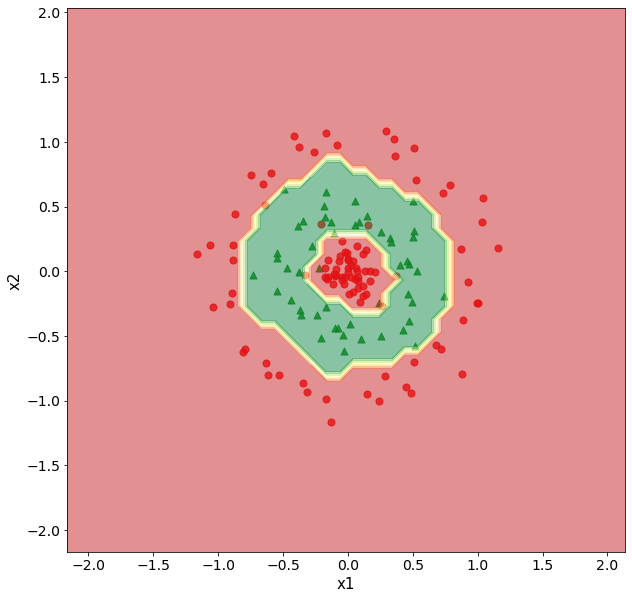

In [501]:
plot_decision_boundaries(Xc2,yc2, MLPClassifier, hidden_layer_sizes = (30,10), max_iter = 5000, random_state = 42)

Outra possibilidade é aumentar o número de neurônios em uma única camada oculta para criar tais regiões.

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

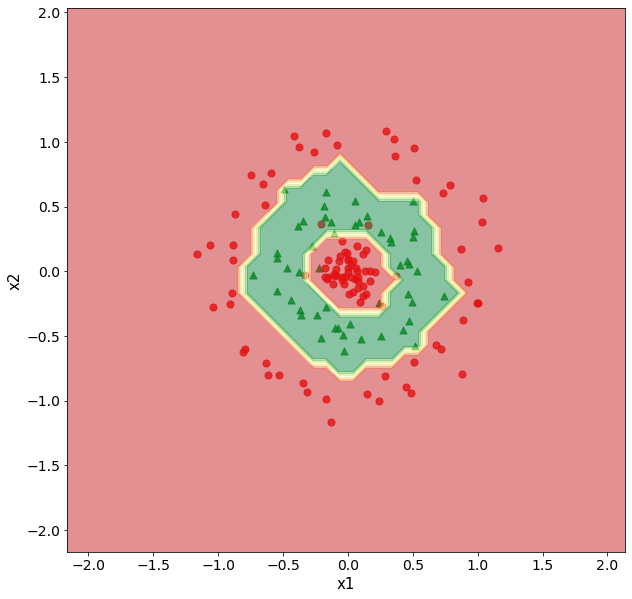

In [494]:
plot_decision_boundaries(Xc2,yc2, MLPClassifier, hidden_layer_sizes = (100,), max_iter = 5000, random_state = 42)

Se com mais neurônios e mais camadas escondidas o algoritmo consegue gerar redes com maior poder de corte do espaço, por que não oferecer a ele o máximo de neurônios e camadas escondidas possível?

Lembre-se do *trade-off* entre **viés** e **variância**. Quando a rede possui muitas possibilidades de cortar o espaço, seu **viés** tende a ser mais baixo, podendo fazer com que sua **variância** seja mais alta. Especialmente nas redes neurais, as quais, por causa de seu **viés de busca**, encontram uma rede neural possível e não se preocupam com a *melhor* possível, a variância tende a ser mais alta.

Considerando a base abaixo, com um pouco mais de ruído, podemos observar uma variância maior na rede com mais neurônios.

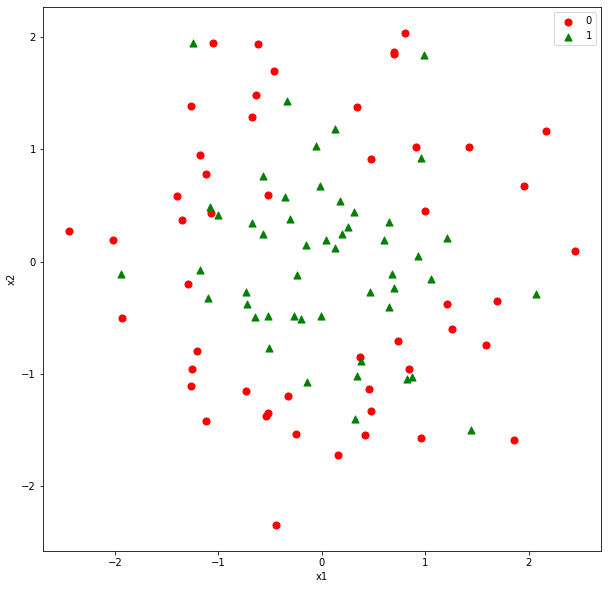

In [502]:
Xc3, yc3 = make_circles(n_samples=100, factor = 0.5, noise = 0.3, random_state = 42)
scaler = StandardScaler()
scaler.fit(Xc3)
Xc3 = scaler.transform(Xc3)
plot_2D_task(Xc3, yc3)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

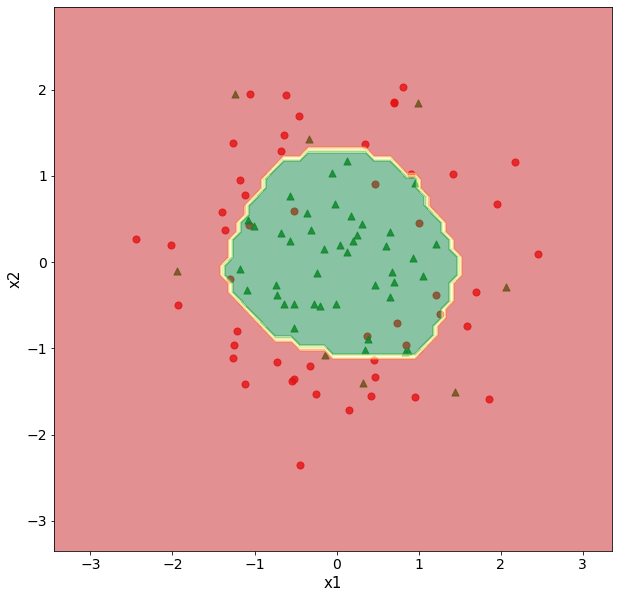

In [496]:
plot_decision_boundaries(Xc3,yc3, MLPClassifier, hidden_layer_sizes = (100,), max_iter = 5000, random_state = 42)

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

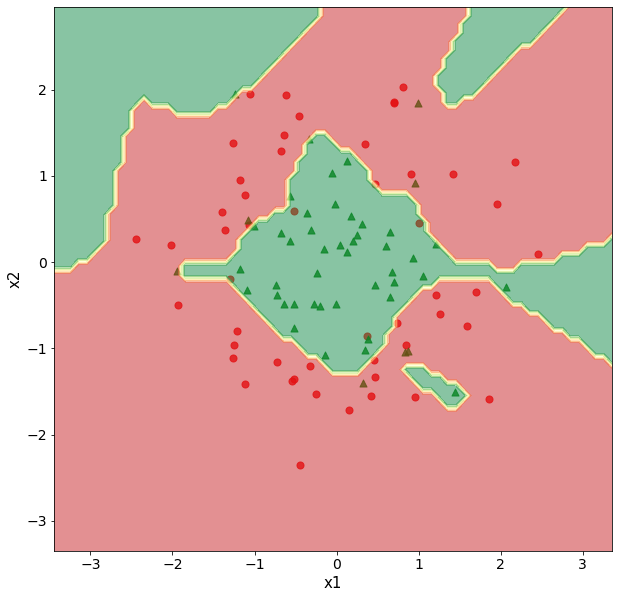

In [497]:
plot_decision_boundaries(Xc3,yc3, MLPClassifier, hidden_layer_sizes = (500,), max_iter = 5000, random_state = 42)

## Alpha

No sklearn, temos um hiperparâmetro chamado alpha. Ele é um valor ponto flutuante que representa o termo de regularização do tipo L2. Seu valor padrão é `0.0001`.

Valores baixos de regularização ajudam a combater *underfitting* e valores altos ajudam a combater *overfitting*. Para mais detalhes sobre regularização, confira o [link](https://www.machinecurve.com/index.php/2020/01/21/what-are-l1-l2-and-elastic-net-regularization-in-neural-networks/) e o [link](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html)

No [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier), temos apenas o hiperparâmetro para o tipo L2 de regularização.

Observamos no exemplo acima que nossa rede está sofrendo com *overfitting*. Usando um valor de alpha maior, observamos diminuição no *overfitting*, mesmo utilizando 500 neurônios na camada oculta.

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

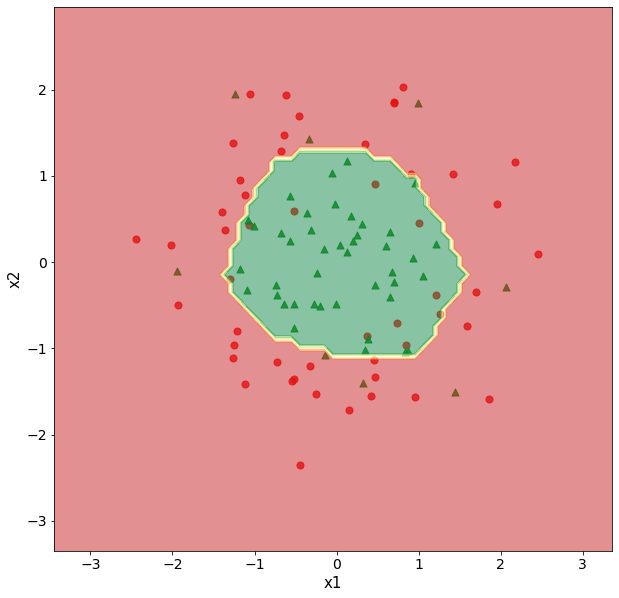

In [503]:
plot_decision_boundaries(Xc3,yc3, MLPClassifier, hidden_layer_sizes = (500,), alpha = 0.1, max_iter = 5000, random_state = 42)

Mas tome cuidado! Colocar um valor muito alto em alpha, pode fazer seu modelo sofrer com *underfitting*.

<module 'matplotlib.pyplot' from '/home/victor/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

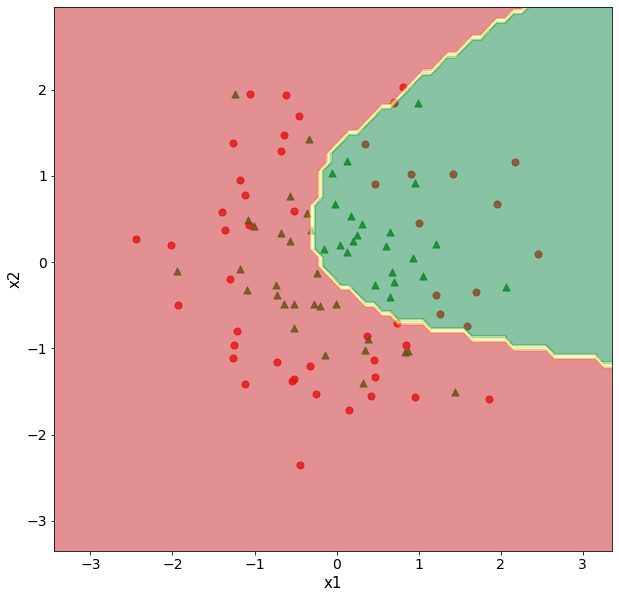

In [506]:
plot_decision_boundaries(Xc3,yc3, MLPClassifier, hidden_layer_sizes = (500,), alpha = 10, max_iter = 5000, random_state = 42)

Por isso, segundo a [documentação do sklearn](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#tips-on-practical-use), uma boa prática é usar um [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para estimar o valor de alpha, considerando valores no intervalo `10.0 ** -np.arange(1, 7)`.

In [7]:
list(10.0 ** -np.arange(1, 7))

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]

## Otimizador

- O hiperparâmetro **solver** é responsável pela otimização dos pesos na rede. Pode assumir qualquer valor do conjunto `{'lbfgs', 'sgd', 'adam'}`, e seu valor padrão é `'adam'`.

Sobre o otimizador [adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

## Taxa de aprendizado

- **learning_rate_init** é um valor do tipo *double* usado para definir a taxa de aprendizado. A taxa de aprendizado é o tamanho do passo para o ajuste dos pesos. Seu valor padrão é `0.001`.


- **learning_rate** é uma *string* que representa a maneira que a rede deve tratar a taxa de aprendizado no processo de treinamento. Seu valor padrão é `'constant'`. Somente usado quando `solver='sgd'`.

    - Para `'constant'`, o valor de learning_rate_init é mantido durante todo o processo de treinamento.
    
    - Para `'invscaling'`, o valor de learning_rate_init é gradualmente decrescido usando o valor do hiperparâmetro powet_t, seguindo a equação seguinte `effective_learning_rate = learning_rate_init / pow(t, power_t)`
    
    - Para adaptive, o valor de learning_rate_init é mantido enquanto o erro diminui de época para época. Se por duas épocas consecutivas, o erro não diminua ou diminua menos do que o valor definido pelo hiperparâmetro tol, o valor de learning_rate_init é dividido por 5.

# Aplicando MLP em um problema real

É muito comum usar redes neurais profundas em bases de dados não estrturadas (como imagens, áudios, vídeos, etc). É possível usar uma rede neural rasa para alguns problemas simples não estruturados. Vamos usar a base MNIST, que contém imagens de dígitos escritos a mão.

Vamos baixar a base diretamente do repositório [OpenML](https://www.openml.org/), onde você pode encontrar diversas bases de dados e desemenhos de modelos já aplicados nas bases.

In [18]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

Vamos visualizar uma das imagens contidas na base

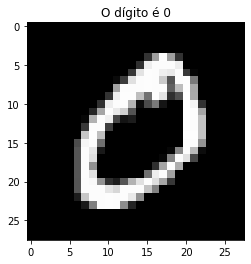

In [4]:
pixels = np.array(X[1,], dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.title('O dígito é {label}'.format(label=y[1]))
plt.imshow(pixels, cmap='gray')
plt.show()

In [19]:
X = X / 255.

X = X[np.any([y == '0', y == '1'], axis = 0)]
y = y[np.any([y == '0', y == '1'], axis = 0)]
print(X.shape)
print(y)

(14780, 784)
['0' '1' '1' ... '1' '0' '1']


In [20]:
X_train, X_test = X[:7000], X[7000:]
y_train, y_test = y[:7000], y[7000:]

Montando um GridSearch

In [21]:
from sklearn.model_selection import GridSearchCV
clf = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(100,), (100,50)],
    'solver': ['sgd', 'adam'],
    'alpha': [0.1, 1e-06],
    'learning_rate_init': [0.1, 1e-06],
    'max_iter': [500],
}

gscv = GridSearchCV(clf, param_grid, cv = 2, scoring = "accuracy")

gscv.fit(X_train, y_train)

/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/victor/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conver

GridSearchCV(cv=2, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0

In [22]:
pd.DataFrame.from_dict(gscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_learning_rate_init,param_max_iter,param_solver,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,11.707121,1.679350,0.034798,0.000276,0.1,"(100,)",0.1,500,sgd,"{'alpha': 0.1, 'hidden_layer_sizes': (100,), '...",0.998571,0.998000,0.998286,0.000286,2
1,6.034628,2.628506,0.032562,0.000050,0.1,"(100,)",0.1,500,adam,"{'alpha': 0.1, 'hidden_layer_sizes': (100,), '...",0.998857,0.995714,0.997286,0.001571,7
2,51.648936,0.209530,0.035446,0.000246,0.1,"(100,)",1e-06,500,sgd,"{'alpha': 0.1, 'hidden_layer_sizes': (100,), '...",0.937429,0.579143,0.758286,0.179143,16
3,61.666689,0.224272,0.034641,0.000007,0.1,"(100,)",1e-06,500,adam,"{'alpha': 0.1, 'hidden_layer_sizes': (100,), '...",0.996000,0.992857,0.994429,0.001571,10
4,17.298592,0.066250,0.038590,0.001232,0.1,"(100, 50)",0.1,500,sgd,"{'alpha': 0.1, 'hidden_layer_sizes': (100, 50)...",0.998571,0.998000,0.998286,0.000286,2
5,7.063679,1.366644,0.036169,0.000577,0.1,"(100, 50)",0.1,500,adam,"{'alpha': 0.1, 'hidden_layer_sizes': (100, 50)...",0.997143,0.996857,0.997000,0.000143,8
6,59.661949,0.051370,0.038838,0.000151,0.1,"(100, 50)",1e-06,500,sgd,"{'alpha': 0.1, 'hidden_layer_sizes': (100, 50)...",0.942571,0.862000,0.902286,0.040286,13
7,79.767146,2.260471,0.069209,0.030487,0.1,"(100, 50)",1e-06,500,adam,"{'alpha': 0.1, 'hidden_layer_sizes': (100, 50)...",0.994571,0.993429,0.994000,0.000571,11
8,2.935459,0.372102,0.034432,0.000221,1e-06,"(100,)",0.1,500,sgd,"{'alpha': 1e-06, 'hidden_layer_sizes': (100,),...",0.998857,0.996571,0.997714,0.001143,6
9,2.697797,0.322581,0.035068,0.002384,1e-06,"(100,)",0.1,500,adam,"{'alpha': 1e-06, 'hidden_layer_sizes': (100,),...",0.998286,0.998286,0.998286,0.000000,1


In [23]:
gscv.best_params_

{'alpha': 1e-06,
 'hidden_layer_sizes': (100,),
 'learning_rate_init': 0.1,
 'max_iter': 500,
 'solver': 'adam'}

In [25]:
gscv.best_score_

0.9982857142857143

In [27]:
model = MLPClassifier(**gscv.best_params_)
model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [28]:
model.score(X_test, y_test)

0.9993573264781491